In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

In [2]:
X=[]
Y=[]
#This are stop_words in common taken from intenet.
stopWord=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","not","can","will","just","may","also","much","get","apr","gmt"]

In [3]:

data_path = r"C:\Div\ML\[Coding Ninjas] Machine Learning and Data Science\38. Project. Text Classification\3.1. Solution\Datasets"
X=[]
Y=[]
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    for docs in os.listdir(category_path):
        file_path = os.path.join(category_path, docs)
        with open(file_path, "r") as file:
            X.append((docs, file.read()))
            Y.append(category)



In [4]:
#X - [('name of the document',"content inside")]
# Y ["category"]

from sklearn.model_selection import  train_test_split
X_tr,X_ts,Y_tr,Y_ts=train_test_split(X,Y)
print(len(X_tr),len(Y_tr))
print(len(X_ts),len(Y_ts))


14997 14997
5000 5000


In [5]:
#making a dictionary
vocabulary={}
for i in range(len(X_tr)):
    words=X_tr[i][1].lower().split()
    for word in words:
        if(not(word.isalpha()) or (word in stopWord) or (len(word)<=2) ):
            continue
        if(word in vocabulary):
            vocabulary[word]+=1
        else:
            vocabulary[word]=1


In [6]:
print(vocabulary)
import operator
sorted_map=sorted(vocabulary.items(),key=operator.itemgetter(1),reverse=True)
print(sorted_map)

{'bomb': 101, 'laws': 474, 'atf': 269, 'burns': 136, 'dividian': 94, 'news': 2122, 'north': 425, 'carolina': 99, 'state': 2066, 'university': 6074, 'psych': 8, 'indiana': 145, 'article': 9114, 'primary': 179, 'purpose': 360, 'fertilizer': 1, 'explode': 18, 'kill': 519, 'maybe': 1130, 'law': 1172, 'saying': 938, 'cannot': 1059, 'use': 4685, 'stuff': 591, 'make': 3697, 'even': 4068, 'pass': 271, 'making': 813, 'illegal': 275, 'people': 6358, 'bombs': 29, 'schaffer': 1, 'thanks': 1215, 'explaining': 51, 'now': 2574, 'stop': 615, 'worrying': 15, 'world': 2711, 'trade': 229, 'towers': 27, 'gene': 56, 'universe': 315, 'black': 600, 'tin': 702, 'decided': 368, 'something': 2383, 'else': 941, 'like': 7146, 'add': 543, 'earlier': 282, 'please': 2328, 'forgive': 48, 'attributions': 3, 'wrong': 681, 'really': 2597, 'appropriate': 279, 'hope': 932, 'excuse': 162, 'laurence': 9, 'battin': 7, 'paul': 538, 'schinder': 6, 'always': 1178, 'confused': 91, 'hole': 222, 'see': 3521, 'event': 272, 'horizon

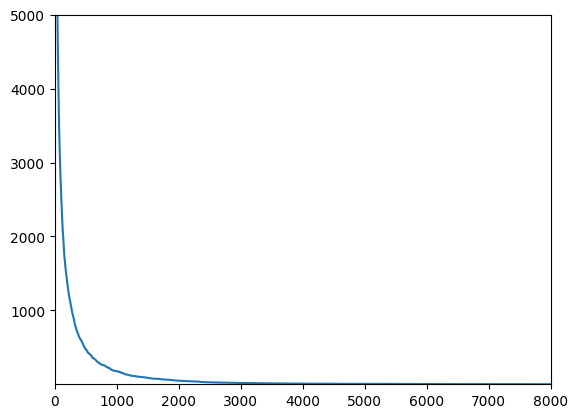

In [7]:
yAxis=[]
freq=[]
for i in range(len(sorted_map)):
    yAxis.append(i)
    freq.append(sorted_map[i][1])
plt.plot(freq,yAxis)
plt.axis([0,8000,1,5000])
plt.show()

In [8]:
features=[sorted_map[i][0] for i in range(2000)]
print(features)

['one', 'article', 'like', 'people', 'university', 'know', 'think', 'use', 'new', 'even', 'good', 'many', 'make', 'see', 'two', 'time', 'want', 'first', 'say', 'anyone', 'need', 'way', 'used', 'world', 'really', 'since', 'now', 'right', 'still', 'believe', 'something', 'take', 'system', 'find', 'computer', 'going', 'please', 'might', 'using', 'said', 'god', 'must', 'last', 'never', 'news', 'back', 'state', 'without', 'well', 'work', 'got', 'someone', 'off', 'better', 'information', 'made', 'government', 'usa', 'read', 'another', 'sure', 'problem', 'number', 'things', 'come', 'look', 'part', 'give', 'windows', 'little', 'help', 'point', 'seems', 'file', 'every', 'years', 'probably', 'put', 'available', 'different', 'data', 'question', 'around', 'long', 'least', 'tell', 'program', 'anything', 'power', 'public', 'set', 'best', 'try', 'software', 'drive', 'thing', 'space', 'lot', 'run', 'hard', 'support', 'case', 'far', 'rather', 'enough', 'keep', 'science', 'fact', 'called', 'great', 'fou

In [9]:
#preparing data_set
X_tr_dataset=np.zeros([len(X_tr),len(features)],int)
print(X_tr_dataset.shape)
for i in range(len(X_tr_dataset)):
    words=X_tr[i][1].lower().split()
    for word in words:
        if(word in features):
            X_tr_dataset[i][features.index(word)]+=1


(14997, 2000)


In [10]:
X_ts_dataset=np.zeros([len(X_ts),len(features)],int)
for docs in range(len(X_ts)):
    words=X_ts[docs][1].lower().split()
    for word in words:
        if(word in features):
            X_ts_dataset[docs][features.index(word)]+=1


In [11]:
print(X_tr_dataset[0])
print("-----------")
print(X_ts_dataset[0])

[0 1 0 ... 0 0 0]
-----------
[1 1 0 ... 0 0 0]


In [12]:
#training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
clf=MultinomialNB()
clf.fit(X_tr_dataset,Y_tr)
y_pred=clf.predict(X_ts_dataset);
print("Score on training data : ",clf.score(X_tr_dataset,Y_tr));
print("Score on testing data : ",clf.score(X_ts_dataset,Y_ts));
print("Classification report------------\n",classification_report(Y_ts,y_pred));
print("Confusion matrix------------\n",confusion_matrix(Y_ts,y_pred));

Score on training data :  0.7898913115956525
Score on testing data :  0.7152
Classification report------------
                           precision    recall  f1-score   support

             alt.atheism       0.63      0.75      0.69       266
           comp.graphics       0.52      0.57      0.54       222
 comp.os.ms-windows.misc       0.61      0.67      0.64       255
comp.sys.ibm.pc.hardware       0.59      0.57      0.58       243
   comp.sys.mac.hardware       0.71      0.67      0.69       266
          comp.windows.x       0.77      0.68      0.72       256
            misc.forsale       0.71      0.79      0.75       271
               rec.autos       0.74      0.75      0.74       252
         rec.motorcycles       0.74      0.77      0.75       242
      rec.sport.baseball       0.81      0.79      0.80       239
        rec.sport.hockey       0.89      0.90      0.89       260
               sci.crypt       0.88      0.85      0.86       259
         sci.electronics     

In [23]:
#string classification
print("Enter a string : ")
#text=str(input())
text="everything you said to me keeps me one step closer to the edge"
words=text.split()
x_check=np.zeros([1,2000],int)
for word in words:
    if(word in features):
        x_check[0][features.index(word)]+=1
ans=clf.predict(x_check)
print("Pedicted Categories : ")
categs=ans[0].split('.')
for i in categs:
    print(i)

Enter a string : 
Pedicted Categories : 
rec
sport
baseball


# User defined Naive Bayes

In [24]:
def fit(X_train_dataset,y_train):
    count={}
    total_words=0
    y_train=np.array(y_train)
    count["total_words_inDoc"]=len(y_train)
    total_categories=set(y_train)
    for curr_category in total_categories:
        docs_of_currCategory=X_train_dataset[y_train==curr_category]
        count[curr_category]={}
        total_word_counter=0;
        temp2=docs_of_currCategory.shape[0];
        for word in features:
            freq_of_word=0
            #iterating through all docs and counting freq of 'word'
            for i in X_tr_dataset:
                freq_of_word+=X_tr_dataset.index(word)
                count[curr_category][word]=freq_of_word
                total_word_counter+=freq_of_word
        #total words in that category
        count[curr_category]["word_in_category"]=total_word_counter;
        #length of data with y_train belonging to a specigic category
        count[i]["length"]=temp2;
    return count;



In [26]:
def probability(X_test,dictionary,categories):
    prior=dictionary[categories]["length"]/dictionary["total_words_inDoc"]
    words=list(dictionary[categories].keys())

    for j in range(len(words)-2):
        docJ=X_test[j]
        if(docJ==0):
            current_prob=0
        else:
            #laplace correction
            numerator=dictionary[categories][words[j]]+1
            denominator=dictionary[categories]["words_in_category"]+len(dictionary[categories].keys())-2;
            current_prob=numerator/denominator;
        prior=prior*current_prob
    return prior

    #prior probabilyt= no of docs belonging to current category/total no of docs


In [ ]:
#choosing the best probability
def predictSingle(x_test,dictionary):
    first_run=True
    categories=dictionary.keys()
    best_prob=1
    best_category=-1
    for category in categories:
        if(category=="total_words_inDoc"):
            continue
        prob=probability(x_test,dictionary,category)
        if(first_run or prob>best_prob):
            best_prob=prob
            best_category=category
            first_run=False
    return best_category

In [ ]:
def predict(X_test,dictionary):
    y_pred=[]
    for i in X_test:
        y_pred.append(predictSingle(i,dictionary))
    return y_pred

In [ ]:
def score(Y_ts,Y_pred):
    count=0;
    for i in range(len(Y_pred)):
        if(Y_pred[i]==Y_ts[i]):
            count+=1
    return count/len(Y_pred)